# Weekly Multi-regression

In [2]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
#pd.options.display.max_rows = 999

### 以週為單位的multi-regression
#### Y是個人小考成績；X是該週前該週進度影片的「觀看總時長」、「暫停次數」、「平均播放速度」

In [3]:
#讀取資料集
df = pd.read_csv('./2019-Spring-Statistics-Project-master/2019-Spring-Statistics-Project-master/data/OR107 grades.csv')

print('Head of dataset:')
display(df.head())

print("Tail of dataset:")
display(df.tail())

Head of dataset:


,student_id,Section,Case Assignment 1 (1579),Case Assignment 2 (1843),Case Assignment 3 (2014),Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025),Homework 1 (1776),Homework 2 (1928),Homework 3 (2103),Final project proposal (2125),Final project (2126),Final Exam (2231)
0,Points Possible,NaN,100.0,100.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,100.0,100.0,0.0,0.00,100.0
1,88,107-2 作業研究 Operations Research,72.0,NaN,NaN,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN
2,89,107-2 作業研究 Operations Research,72.0,82.0,84.0,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN,76.0,85.0,69.0,NaN,92.69,41.0
3,90,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tail of dataset:


,student_id,Section,Case Assignment 1 (1579),Case Assignment 2 (1843),Case Assignment 3 (2014),Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025),Homework 1 (1776),Homework 2 (1928),Homework 3 (2103),Final project proposal (2125),Final project (2126),Final Exam (2231)
79,166,107-2 作業研究 Operations Research,69.0,86.0,100.0,10.0,9.0,8.0,10.0,10.0,NaN,10.0,8.0,8.0,100.0,78.0,93.0,NaN,94.76,70.0
80,167,107-2 作業研究 Operations Research,87.0,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,168,107-2 作業研究 Operations Research,72.0,90.0,97.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,98.0,95.0,89.0,NaN,94.61,75.0
82,169,107-2 作業研究 Operations Research,117.0,95.0,100.0,10.0,8.0,10.0,10.0,10.0,8.0,8.0,9.0,10.0,98.0,96.0,85.0,NaN,98.50,82.0
83,170,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['student_id', 'Section', 'Case Assignment 1 (1579)',
       'Case Assignment 2 (1843)', 'Case Assignment 3 (2014)',
       'Pre-lecture problems for Lecture 2 (1631)',
       'Pre-lecture problems for Lecture 3 (1683)',
       'Pre-lecture problems for Lecture 4 (1731)',
       'Pre-lecture problems for Lecture 5 (1779)',
       'Pre-lecture Problems for Lecture 6 (1811)',
       'Pre-lecture Problems for Lecture 7 (1877)',
       'Pre-lecture Problems for Lecture 9 (1942)',
       'Pre-lecture Problems for Lecture 10 (1990)',
       'Pre-lecture Problems for Lecture 11 (2025)', 'Homework 1 (1776)',
       'Homework 2 (1928)', 'Homework 3 (2103)',
       'Final project proposal (2125)', 'Final project (2126)',
       'Final Exam (2231)'],
      dtype='object')

In [5]:
df_grade = df.loc[:,['student_id',
          'Pre-lecture problems for Lecture 2 (1631)',
   'Pre-lecture problems for Lecture 3 (1683)',
       'Pre-lecture problems for Lecture 4 (1731)',
       'Pre-lecture problems for Lecture 5 (1779)',
       'Pre-lecture Problems for Lecture 6 (1811)',
       'Pre-lecture Problems for Lecture 7 (1877)',
       'Pre-lecture Problems for Lecture 9 (1942)',
       'Pre-lecture Problems for Lecture 10 (1990)',
          'Pre-lecture Problems for Lecture 11 (2025)']]

print('Head of dataset:')
display(df_grade.head())

print("Tail of dataset:")
display(df_grade.tail())

Head of dataset:


,student_id,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
0,Points Possible,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,88,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
2,89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
3,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tail of dataset:


,student_id,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
79,166,10.0,9.0,8.0,10.0,10.0,NaN,10.0,8.0,8.0
80,167,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,168,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0
82,169,10.0,8.0,10.0,10.0,10.0,8.0,8.0,9.0,10.0
83,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_grade = df_grade.iloc[1:]
df_grade.set_index('student_id', inplace=True)
print('Head of dataset:')
display(df_grade.head())

Head of dataset:


,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
student_id,,,,,,,,,
88,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_grade.columns = ['Lecture 2','Lecture 3','Lecture 4','Lecture 5','Lecture 6','Lecture 7','Lecture 9','Lecture 10','Lecture 11',]
df_grade.head()

,Lecture 2,Lecture 3,Lecture 4,Lecture 5,Lecture 6,Lecture 7,Lecture 9,Lecture 10,Lecture 11
student_id,,,,,,,,,
88,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_grade = df_grade.fillna(0)
df_grade.head()

,Lecture 2,Lecture 3,Lecture 4,Lecture 5,Lecture 6,Lecture 7,Lecture 9,Lecture 10,Lecture 11
student_id,,,,,,,,,
88,0.0,9.0,0.0,8.0,10.0,0.0,0.0,0.0,0.0
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_grade.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df_grade.head()

,0,1,2,3,4,5,6,7,8
student_id,,,,,,,,,
88,0.0,9.0,0.0,8.0,10.0,0.0,0.0,0.0,0.0
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 上面是「個人小考成績」

In [10]:
#讀取資料集
df_time = pd.read_excel('./OR107time.xlsx')

print('Head of dataset:')
display(df_time.head())

print("Tail of dataset:")
display(df_time.tail())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
0,88,1993,3111,2048,0,0,4579,0,0,0,11731
1,89,4775,3686,3155,3871,0,0,2087,717,1198,19489
2,90,0,0,0,0,0,0,0,0,0,0
3,91,0,0,0,0,0,0,0,0,0,0
4,92,0,0,0,0,0,0,0,0,0,0


Tail of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
82,170,0,0,0,0,0,0,0,0,0,0
83,171,0,0,0,0,0,0,0,0,0,0
84,172,0,0,0,0,0,0,0,0,0,0
85,173,0,0,0,0,0,0,0,0,0,0
86,174,0,0,0,0,0,0,0,0,0,0


In [11]:
df_time.set_index(df_time[0], inplace=True)

print('Head of dataset:')
display(df_time.head())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
0,,,,,,,,,,,
88,88,1993,3111,2048,0,0,4579,0,0,0,11731
89,89,4775,3686,3155,3871,0,0,2087,717,1198,19489
90,90,0,0,0,0,0,0,0,0,0,0
91,91,0,0,0,0,0,0,0,0,0,0
92,92,0,0,0,0,0,0,0,0,0,0


In [12]:
df_time = df_time.drop(columns = 0)
df_time.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 'Total']
df_time.head()

,0,1,2,3,4,5,6,7,8,Total
0,,,,,,,,,,
88,1993,3111,2048,0,0,4579,0,0,0,11731
89,4775,3686,3155,3871,0,0,2087,717,1198,19489
90,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0


#### 上面是「觀看總時長」

In [13]:
#讀取資料集
df_pause = pd.read_excel('./OR 107pause.xlsx')

print('Head of dataset:')
display(df_pause.head())

print("Tail of dataset:")
display(df_pause.tail())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
0,88,17,11,11,0,0,19,0,0,0,58
1,89,34,19,21,20,0,0,7,2,4,107
2,90,0,0,0,0,0,0,0,0,0,0
3,91,0,0,0,0,0,0,0,0,0,0
4,92,0,0,0,0,0,0,0,0,0,0


Tail of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
82,170,0,0,0,0,0,0,0,0,0,0
83,171,0,0,0,0,0,0,0,0,0,0
84,172,0,0,0,0,0,0,0,0,0,0
85,173,0,0,0,0,0,0,0,0,0,0
86,174,0,0,0,0,0,0,0,0,0,0


In [14]:
df_pause.set_index(0, inplace=True)

print('Head of dataset:')
display(df_pause.head())

Head of dataset:


,1,2,3,4,5,6,7,8,9,Total
0,,,,,,,,,,
88,17,11,11,0,0,19,0,0,0,58
89,34,19,21,20,0,0,7,2,4,107
90,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0


In [15]:
df_pause.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 'Total']
df_pause.head()

,0,1,2,3,4,5,6,7,8,Total
0,,,,,,,,,,
88,17,11,11,0,0,19,0,0,0,58
89,34,19,21,20,0,0,7,2,4,107
90,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0


#### 上面是「暫停次數」

In [16]:
#讀取資料集
df_rate = pd.read_excel('./OR107average_playback_rate.xlsx')

print('Head of dataset:')
display(df_rate.head())

print("Tail of dataset:")
display(df_rate.tail())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9
0,88,1.030105,1.293796,1.554199,0.000000,0.0,0.94038,0.000000,0.000000,0.000000
1,89,1.214450,1.275638,1.451664,1.331439,0.0,0.00000,1.472448,1.447699,1.321369
2,90,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
3,91,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
4,92,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


Tail of dataset:


,0,1,2,3,4,5,6,7,8,9
82,170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_rate.set_index(0, inplace=True)

print('Head of dataset:')
display(df_rate.head())

Head of dataset:


,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
88,1.030105,1.293796,1.554199,0.000000,0.0,0.94038,0.000000,0.000000,0.000000
89,1.214450,1.275638,1.451664,1.331439,0.0,0.00000,1.472448,1.447699,1.321369
90,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
91,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
92,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


In [18]:
df_rate.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df_rate.head()

,0,1,2,3,4,5,6,7,8
0,,,,,,,,,
88,1.030105,1.293796,1.554199,0.000000,0.0,0.94038,0.000000,0.000000,0.000000
89,1.214450,1.275638,1.451664,1.331439,0.0,0.00000,1.472448,1.447699,1.321369
90,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
91,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
92,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


#### 上面是「平均播放速度」

## week資料

In [25]:
def regression(index):  
    Grade = df_grade.iloc[:,index].values
    size = Grade.shape[0]
    time = df_time.iloc[:size,index]
    pause = df_pause.iloc[:size,index]
    rate = df_rate.iloc[:size,index]
    #df_grade
    week = pd.concat([time,pause,rate],axis=1)
    
    week['Grade']=Grade
    week.columns = ['time','pause','rate','Grade']
    week.head()
    
    #summary statistic
    display(week.describe())
    #plot
    y = week['Grade'].values
    xnames = ['time',"pause",'rate']
    print("Sctter Plot:")
    for aname in xnames:
        x = week[aname].values

        _ = plt.plot(x, y, 'o', color = 'b')
        plt.xlabel(aname)
        plt.ylabel('Grade')
        plt.show()
    
    #corr
    print("Correlation coefficients:")
    corr1 = week.corr()
    display(corr1)
#    display(_)
    #result
    week = week.dropna()
    week_result1 = smf.ols('Grade ~ time + pause + rate', data=week).fit()
    # Inspect the results
    print("Model Result:")
    print(week_result1.summary())
    
    #resdual
    print("\n Residual Analysis:")
    for i in range(2):
        if(i == 0):
            hist = plt.hist(week_result1.resid_pearson, bins = 'auto')
        else:
            fig = sm.qqplot(week_result1.resid_pearson, stats.norm, fit=True, line='45')
        
        
    
    stat, p = stats.shapiro(week_result1.resid_pearson)
    print('Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

FOR WEEK 0 :


,time,pause,rate,Grade
count,83.000000,83.000000,83.000000,83.000000
mean,1929.831325,30.228916,0.889692,5.939759
std,2006.997064,41.937330,0.705932,4.604741
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1854.000000,20.000000,1.229535,9.000000
75%,3495.000000,38.500000,1.394418,10.000000
max,9953.000000,222.000000,2.020353,10.000000


Sctter Plot:


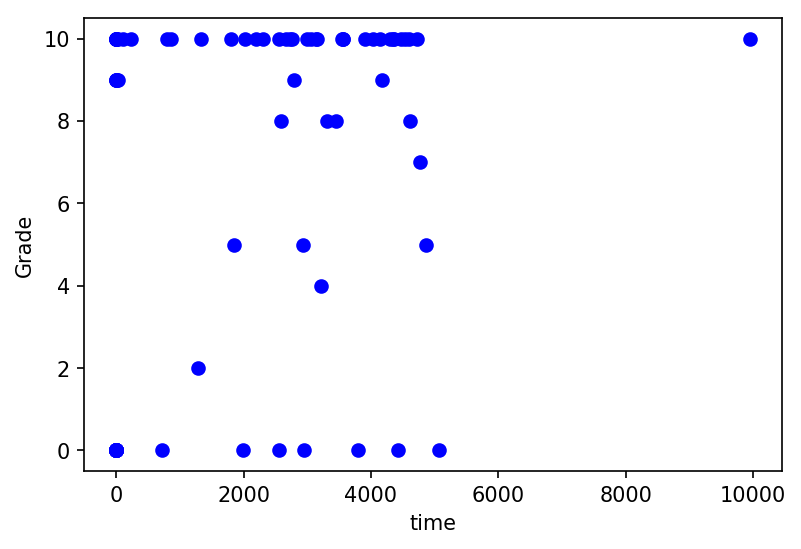

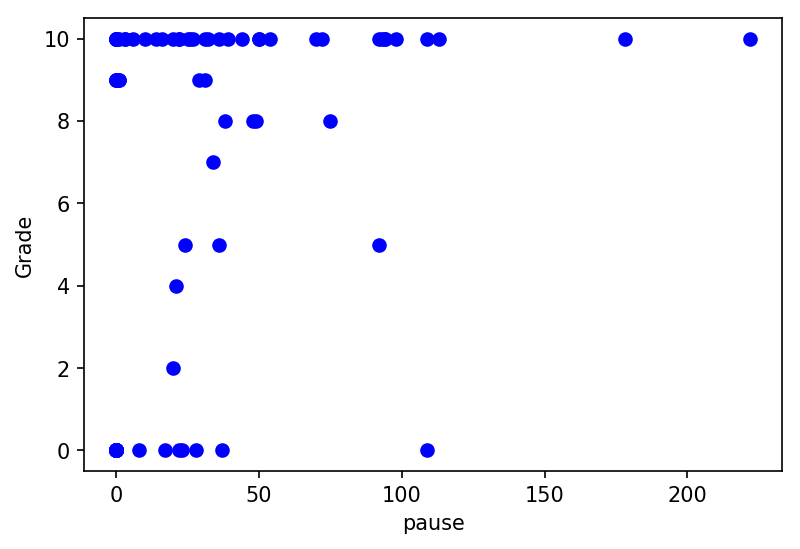

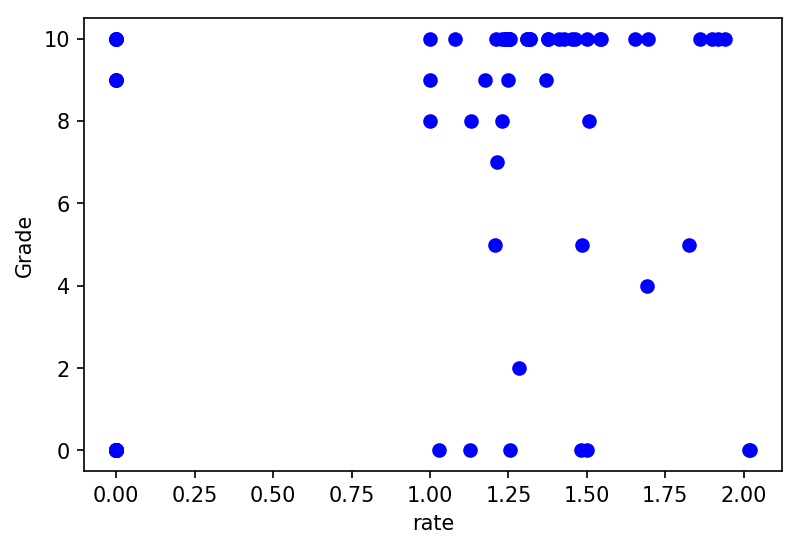

Correlation coefficients:


,time,pause,rate,Grade
time,1.000000,0.755309,0.643967,0.406627
pause,0.755309,1.000000,0.493751,0.386304
rate,0.643967,0.493751,1.000000,0.504068
Grade,0.406627,0.386304,0.504068,1.000000


Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     10.19
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           9.50e-06
Time:                        02:11:06   Log-Likelihood:                -230.44
No. Observations:                  83   AIC:                             468.9
Df Residuals:                      79   BIC:                             478.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9287      0.711      

,time,pause,rate,Grade
count,83.000000,83.000000,83.000000,83.000000
mean,1841.975904,45.867470,0.954096,6.180723
std,1839.222708,81.339513,0.709026,4.425934
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1297.000000,19.000000,1.242349,9.000000
75%,3448.500000,51.500000,1.504964,10.000000
max,7224.000000,505.000000,2.020000,10.000000


Sctter Plot:


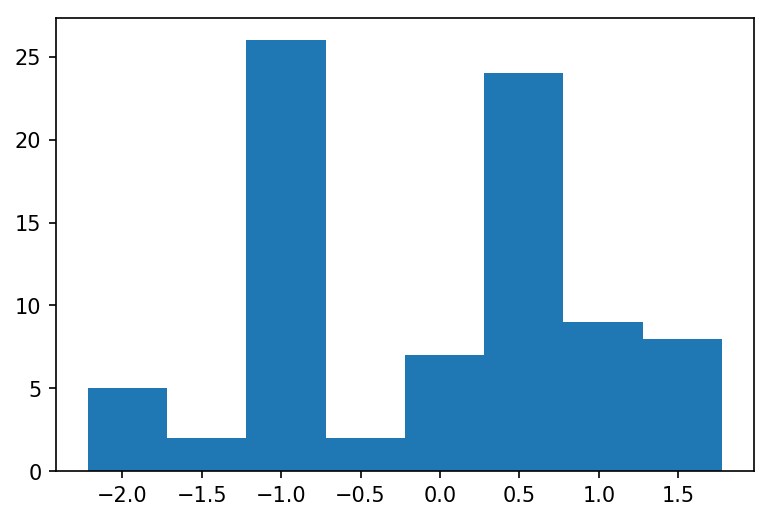

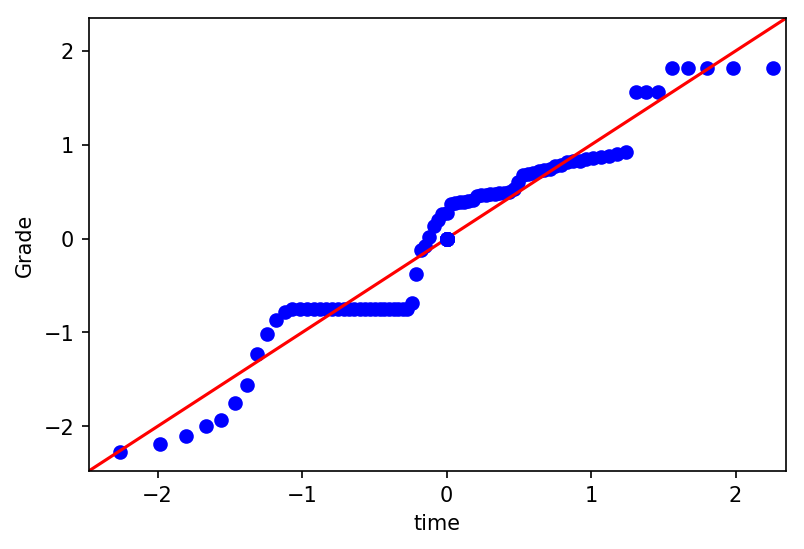

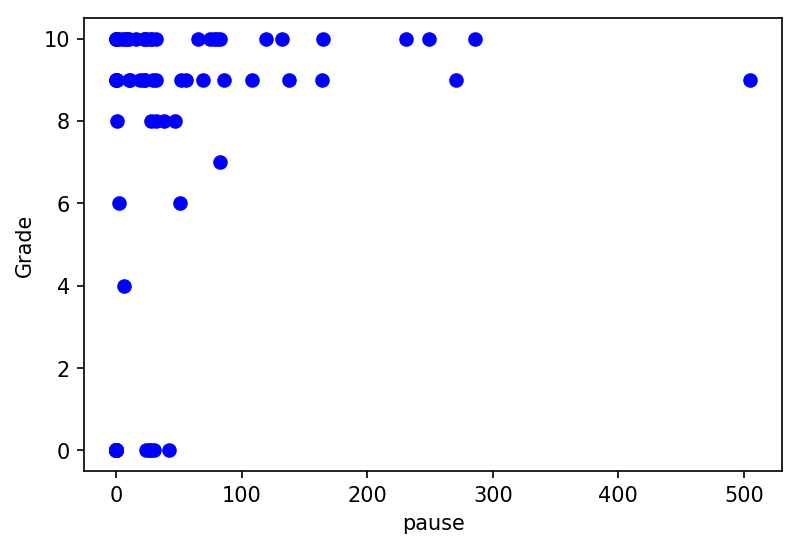

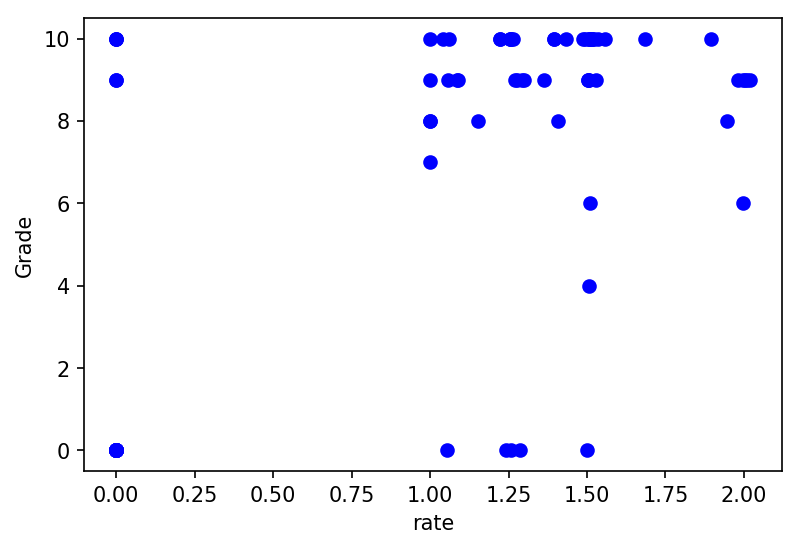

Correlation coefficients:


,time,pause,rate,Grade
time,1.000000,0.632542,0.581647,0.600747
pause,0.632542,1.000000,0.350923,0.360938
rate,0.581647,0.350923,1.000000,0.672957
Grade,0.600747,0.360938,0.672957,1.000000


Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.42e-12
Time:                        02:11:07   Log-Likelihood:                -210.33
No. Observations:                  83   AIC:                             428.7
Df Residuals:                      79   BIC:                             438.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8624      0.585      

,time,pause,rate,Grade
count,83.000000,83.000000,83.000000,83.000000
mean,1055.554217,19.975904,0.770253,4.915663
std,1269.591102,35.577801,0.776147,4.194086
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,28.000000,1.000000,1.000000,7.000000
75%,2281.000000,28.000000,1.493637,9.000000
max,3809.000000,177.000000,2.002153,10.000000


Sctter Plot:


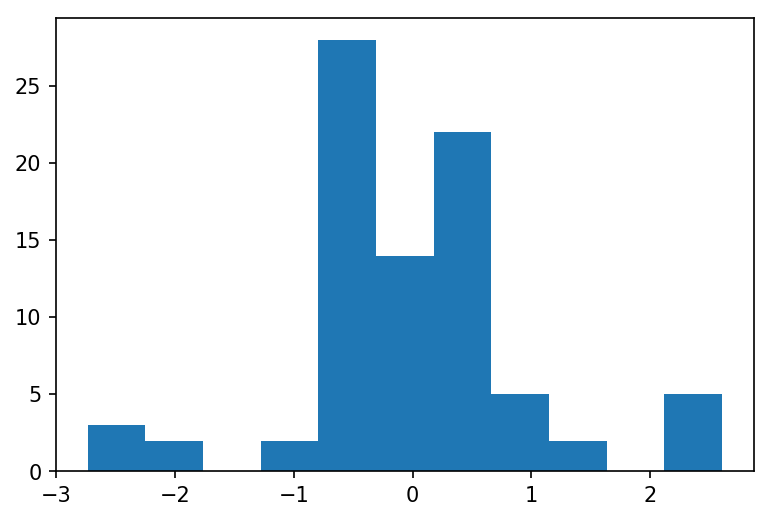

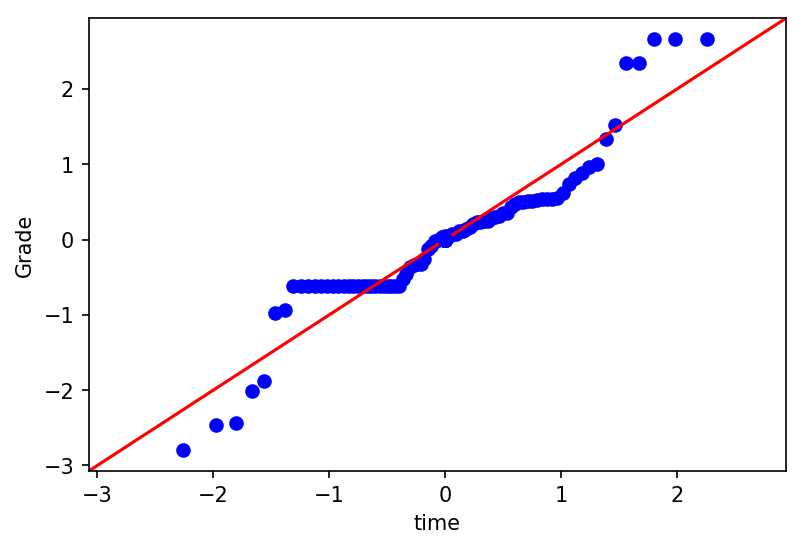

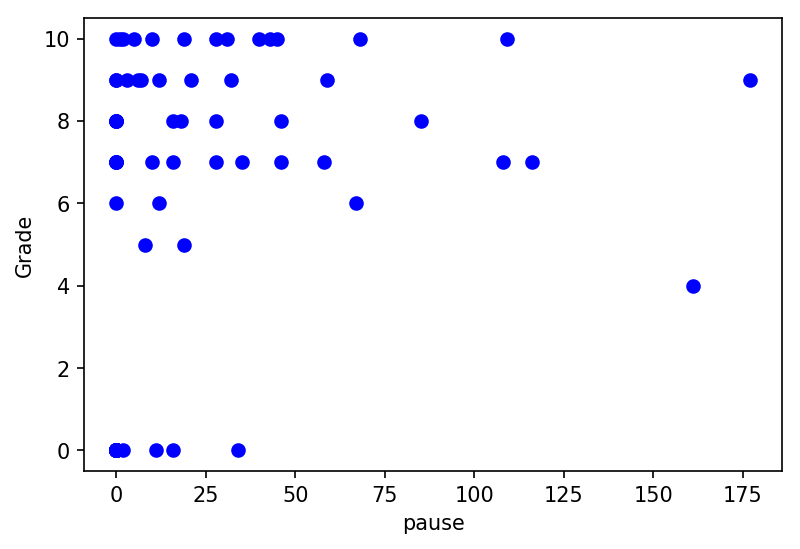

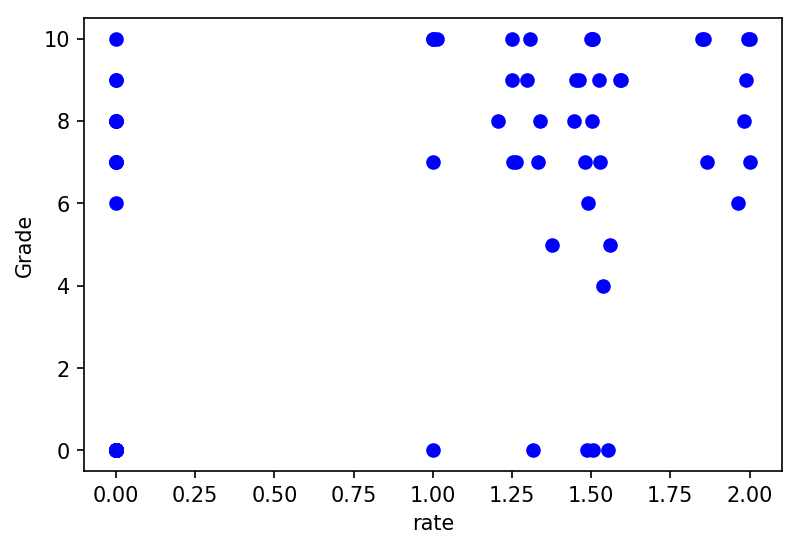

Correlation coefficients:


,time,pause,rate,Grade
time,1.000000,0.575861,0.774269,0.599214
pause,0.575861,1.000000,0.509770,0.361959
rate,0.774269,0.509770,1.000000,0.586062
Grade,0.599214,0.361959,0.586062,1.000000


Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     17.29
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.01e-08
Time:                        02:11:08   Log-Likelihood:                -215.32
No. Observations:                  83   AIC:                             438.6
Df Residuals:                      79   BIC:                             448.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3808      0.516      

,time,pause,rate,Grade
count,83.000000,83.000000,83.000000,83.000000
mean,1503.939759,35.638554,0.711225,5.578313
std,1774.960181,74.335196,0.767917,4.765528
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,9.000000
75%,3341.000000,41.000000,1.497027,10.000000
max,5445.000000,468.000000,2.008901,10.000000


Sctter Plot:


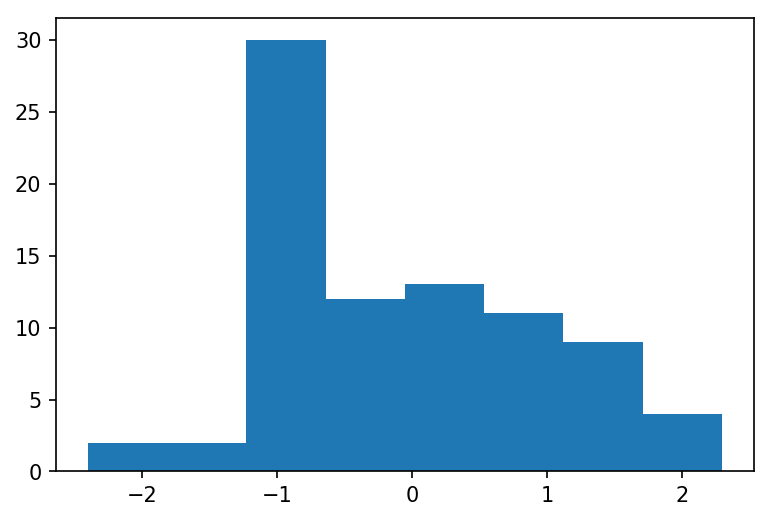

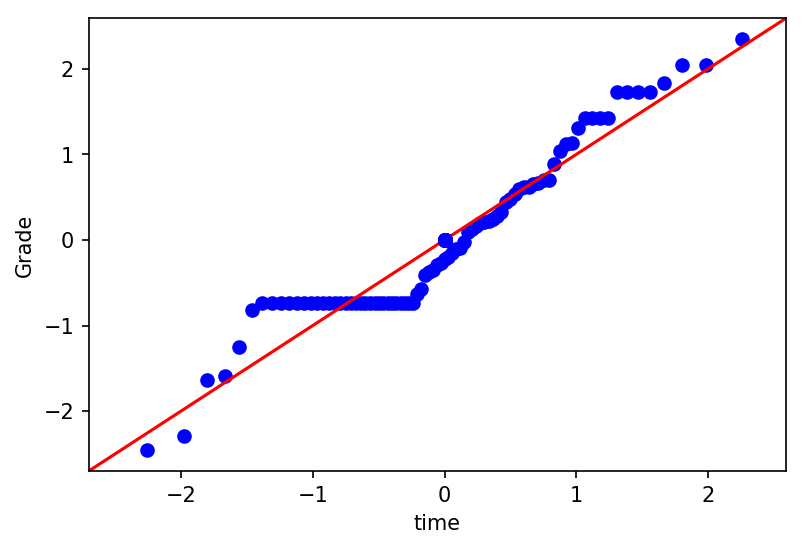

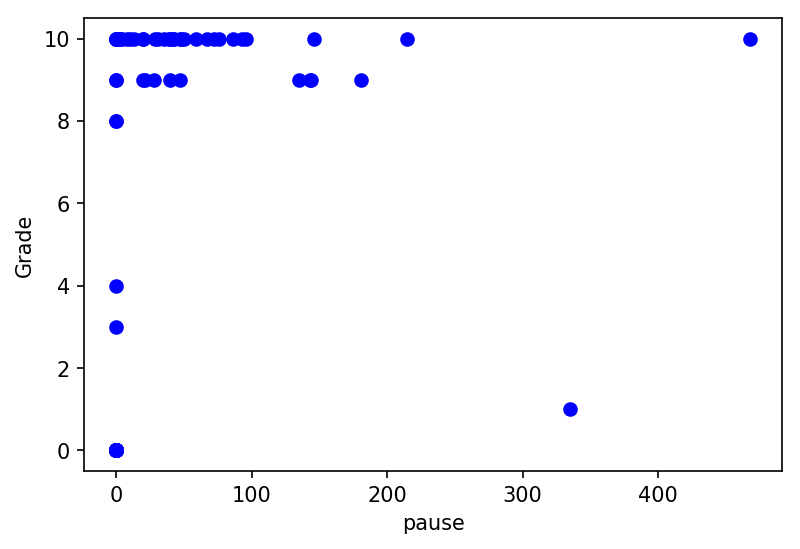

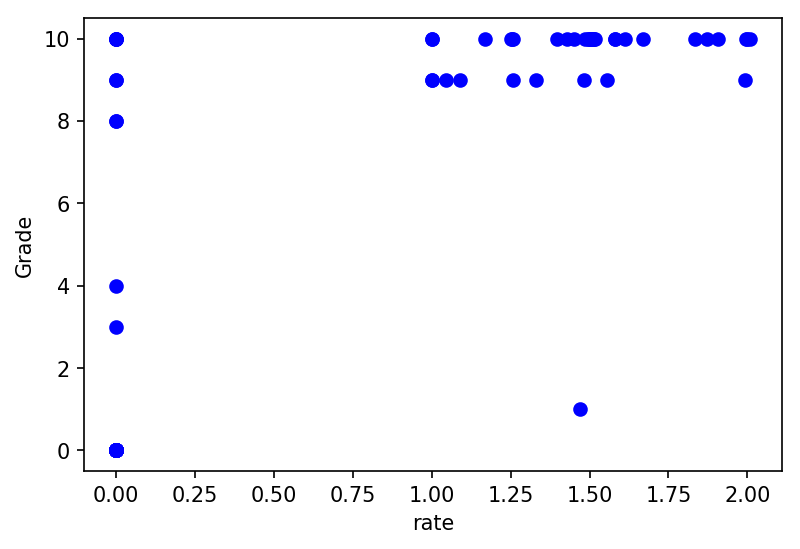

Correlation coefficients:


,time,pause,rate,Grade
time,1.000000,0.575855,0.827276,0.695934
pause,0.575855,1.000000,0.487009,0.320342
rate,0.827276,0.487009,1.000000,0.786605
Grade,0.695934,0.320342,0.786605,1.000000


Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     46.15
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           2.46e-17
Time:                        02:11:09   Log-Likelihood:                -204.85
No. Observations:                  83   AIC:                             417.7
Df Residuals:                      79   BIC:                             427.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0411      0.442      

,time,pause,rate,Grade
count,83.000000,83.000000,83.000000,83.000000
mean,956.674699,15.843373,0.746166,6.072289
std,1203.283476,31.022212,0.805398,4.764664
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,10.000000
75%,2103.500000,24.500000,1.515744,10.000000
max,3725.000000,166.000000,2.028571,10.000000


Sctter Plot:


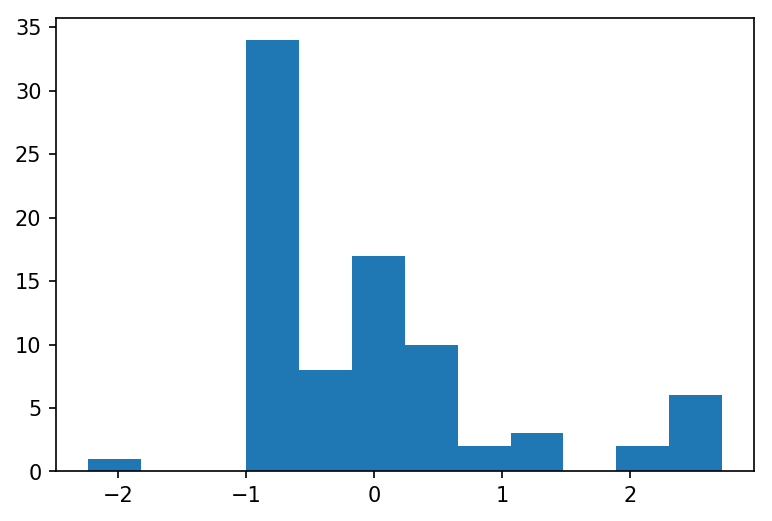

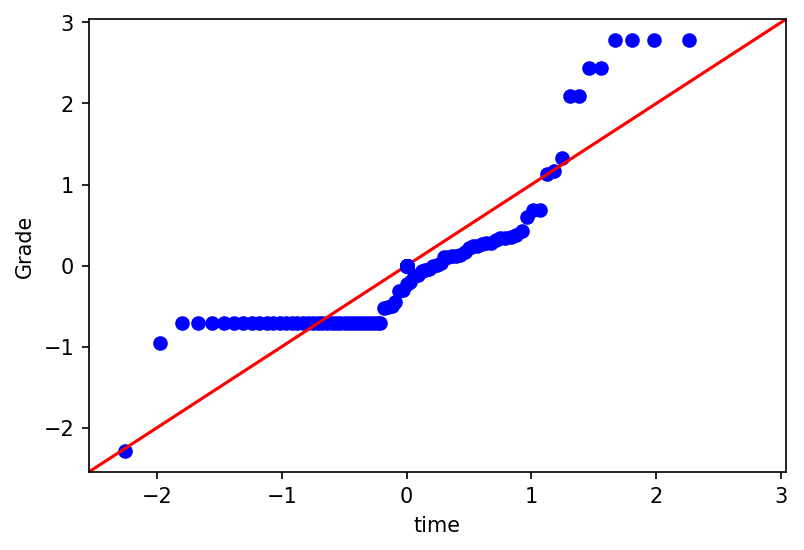

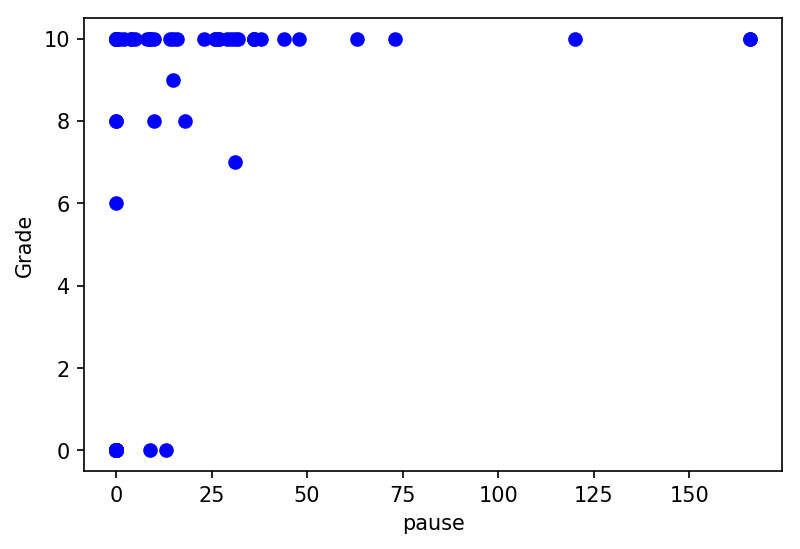

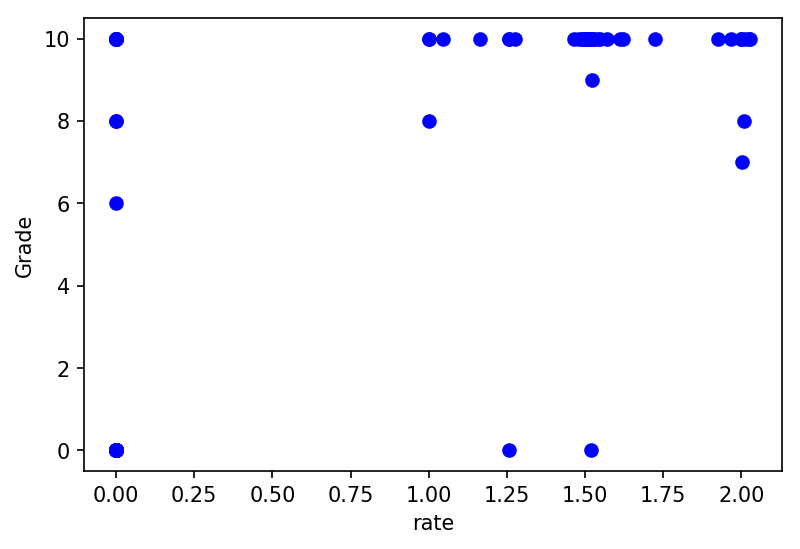

Correlation coefficients:


,time,pause,rate,Grade
time,1.000000,0.628169,0.761356,0.563796
pause,0.628169,1.000000,0.506977,0.394452
rate,0.761356,0.506977,1.000000,0.641775
Grade,0.563796,0.394452,0.641775,1.000000


Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     19.58
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.38e-09
Time:                        02:11:10   Log-Likelihood:                -223.78
No. Observations:                  83   AIC:                             455.6
Df Residuals:                      79   BIC:                             465.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1651      0.555      

,time,pause,rate,Grade
count,83.000000,83.000000,83.000000,83.000000
mean,1135.746988,19.566265,0.594255,4.192771
std,1634.063906,45.922573,0.762286,4.223794
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,4.000000
75%,2723.000000,18.500000,1.437655,8.500000
max,5108.000000,256.000000,2.010457,10.000000


Sctter Plot:


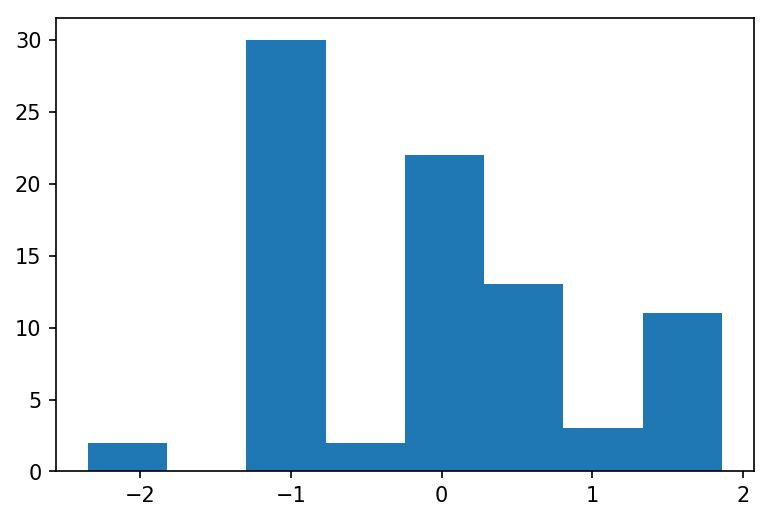

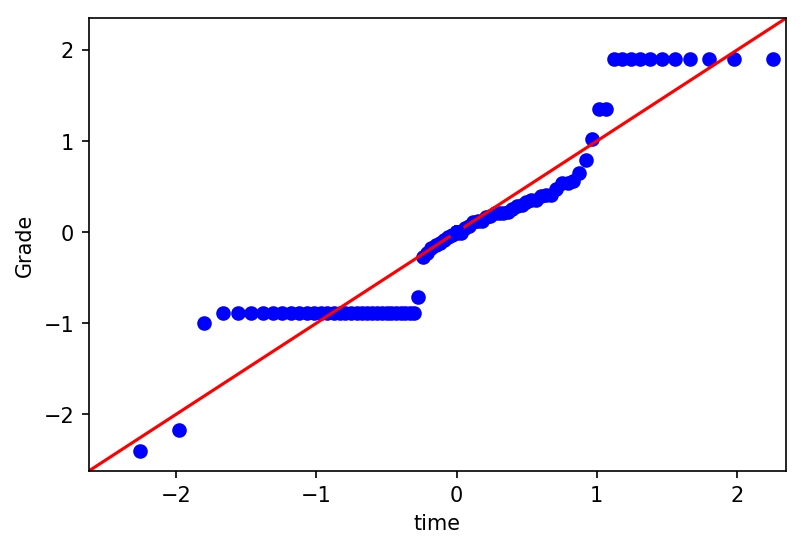

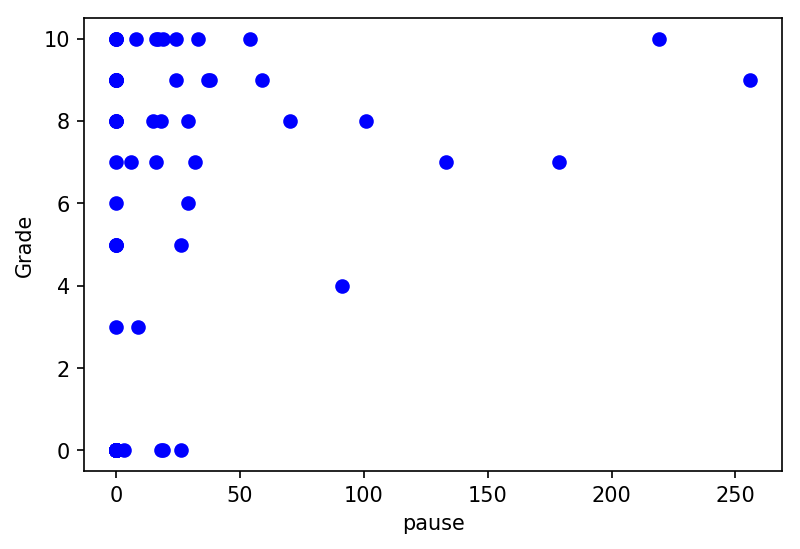

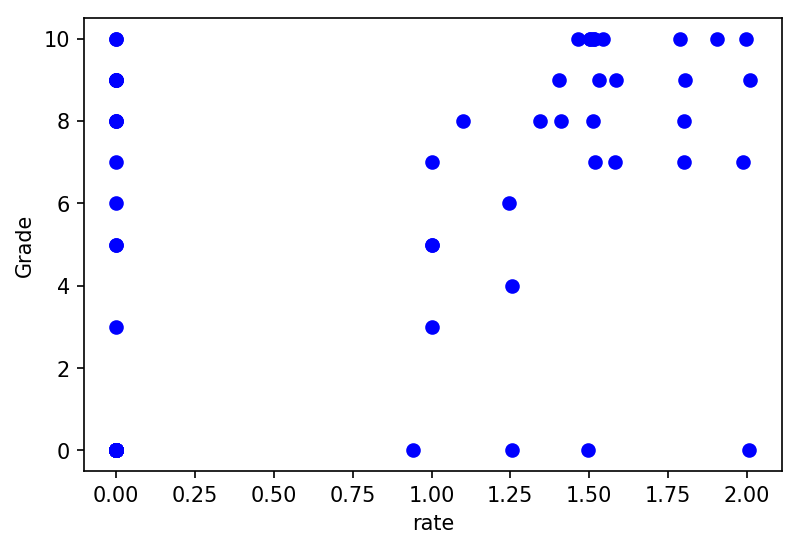

Correlation coefficients:


,time,pause,rate,Grade
time,1.000000,0.640290,0.807534,0.474142
pause,0.640290,1.000000,0.529419,0.373330
rate,0.807534,0.529419,1.000000,0.581729
Grade,0.474142,0.373330,0.581729,1.000000


Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     13.88
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           2.35e-07
Time:                        02:11:12   Log-Likelihood:                -219.28
No. Observations:                  83   AIC:                             446.6
Df Residuals:                      79   BIC:                             456.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2858      0.488      

,time,pause,rate,Grade
count,83.000000,83.000000,83.000000,83.000000
mean,1710.385542,32.795181,0.821789,5.204819
std,1964.627885,59.486165,0.772172,4.736364
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,43.000000,4.000000,1.000000,8.000000
75%,3346.000000,44.000000,1.515229,10.000000
max,5848.000000,323.000000,2.056673,10.000000


Sctter Plot:


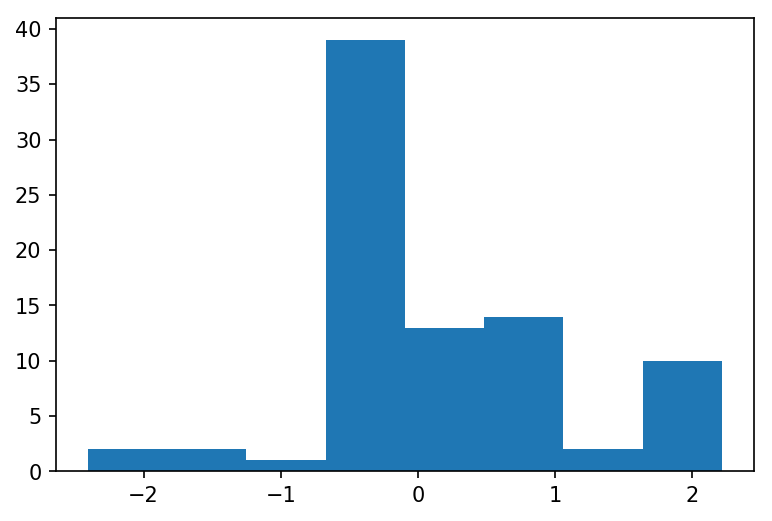

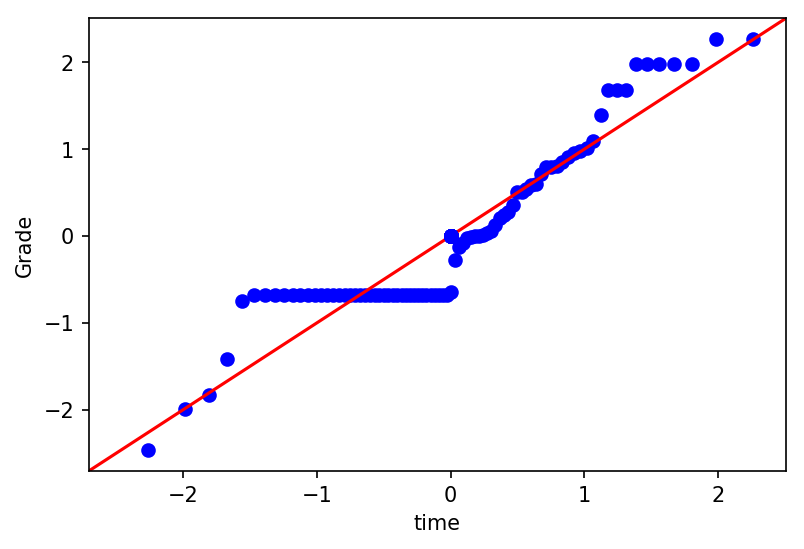

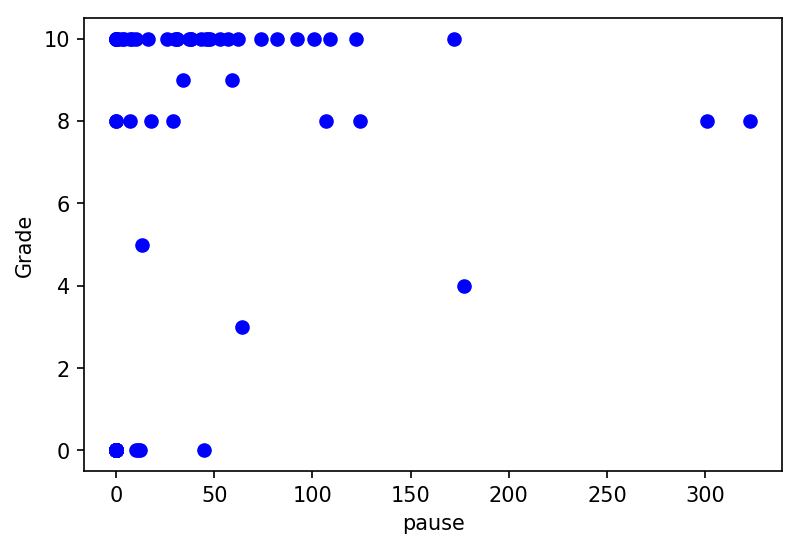

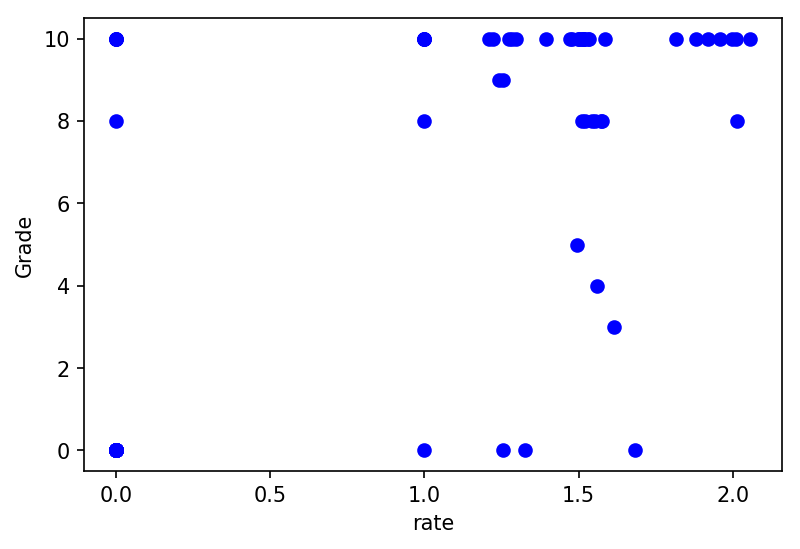

Correlation coefficients:


,time,pause,rate,Grade
time,1.000000,0.647808,0.775007,0.603110
pause,0.647808,1.000000,0.523463,0.380312
rate,0.775007,0.523463,1.000000,0.731021
Grade,0.603110,0.380312,0.731021,1.000000


Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     30.76
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           2.82e-13
Time:                        02:11:13   Log-Likelihood:                -214.24
No. Observations:                  83   AIC:                             436.5
Df Residuals:                      79   BIC:                             446.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4934      0.528      

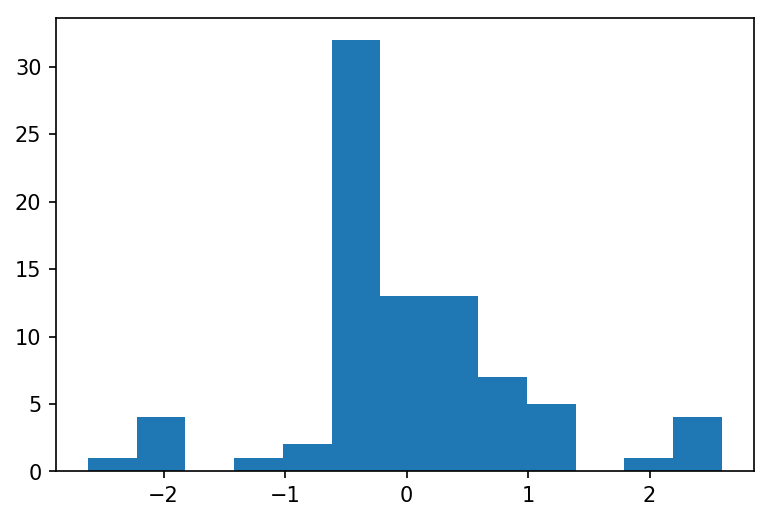

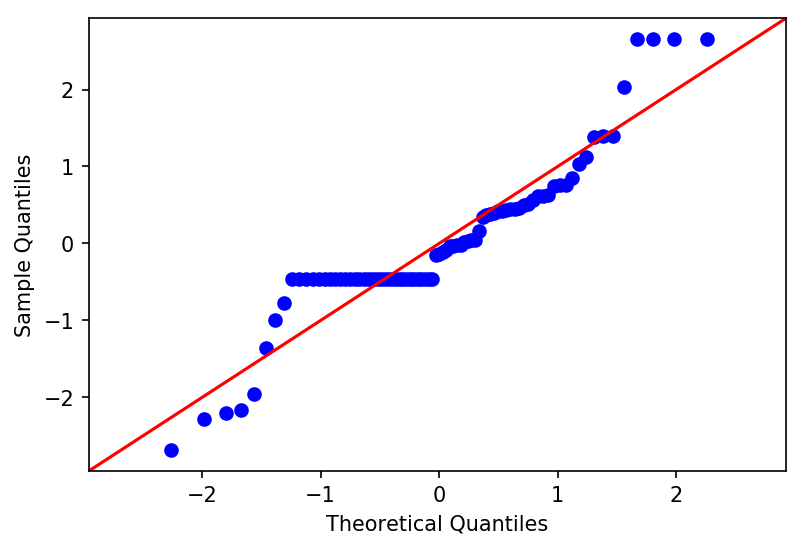

In [26]:
for index in range(7):
    print("FOR WEEK", index,":")
    regression(index)
